Data is got from https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv").dropna()
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [4]:
data = data.astype("float")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 60.0 KB


In [5]:
y = data["Outcome"]
X = data.drop("Outcome", axis=1)

In [6]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

In [7]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [8]:
print(len(X.columns))

8


<AxesSubplot:>

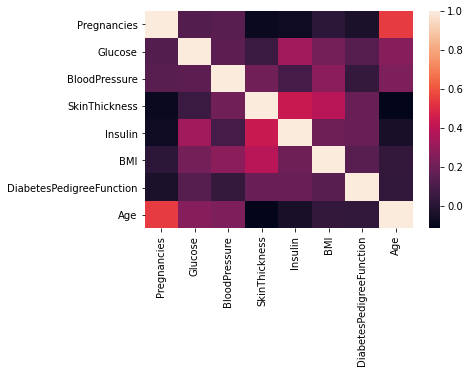

In [9]:
sns.heatmap(X.corr())

In [10]:
corrMatrix = X.corr()
variables = []

for i in corrMatrix.columns:
    for j in list(corrMatrix.columns)[list(corrMatrix.columns).index(i):]:
        if(i!=j):
            if(abs(corrMatrix[i][j])>=0.3):
                variables.append(i)

variables = list(pd.Series(variables).unique())
print(variables)

['Pregnancies', 'Glucose', 'SkinThickness']


In [11]:
X = X.drop(variables, axis=1)

In [12]:
print(len(X.columns))

5


In [13]:
y.to_frame().to_csv("y.csv")
X.to_csv("X.csv")

In [14]:
XdataString = ""
YdataString = ""

In [15]:
Xcolumns = list(X.columns)
Xindex = list(X.index)
Yindex = list(y.index)

In [16]:
print(X.columns)

Index(['BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


In [17]:
for row in Xindex:
    for col in Xcolumns:
        XdataString += str(X[col][row])
        if(Xcolumns.index(col)==len(Xcolumns)-1):
            XdataString += '\n'
        else:
            XdataString += " "
print(XdataString)

72.0 0.0 33.6 0.627 50.0
66.0 0.0 26.6 0.35100000000000003 31.0
64.0 0.0 23.3 0.672 32.0
66.0 94.0 28.1 0.16699999999999998 21.0
40.0 168.0 43.1 2.2880000000000003 33.0
74.0 0.0 25.6 0.201 30.0
50.0 88.0 31.0 0.248 26.0
0.0 0.0 35.3 0.134 29.0
70.0 543.0 30.5 0.158 53.0
96.0 0.0 0.0 0.23199999999999998 54.0
92.0 0.0 37.6 0.191 30.0
74.0 0.0 38.0 0.537 34.0
80.0 0.0 27.1 1.4409999999999998 57.0
60.0 846.0 30.1 0.39799999999999996 59.0
72.0 175.0 25.8 0.5870000000000001 51.0
0.0 0.0 30.0 0.484 32.0
84.0 230.0 45.8 0.551 31.0
74.0 0.0 29.6 0.254 31.0
30.0 83.0 43.3 0.183 33.0
70.0 96.0 34.6 0.529 32.0
88.0 235.0 39.3 0.7040000000000001 27.0
84.0 0.0 35.4 0.38799999999999996 50.0
90.0 0.0 39.8 0.451 41.0
80.0 0.0 29.0 0.263 29.0
94.0 146.0 36.6 0.254 51.0
70.0 115.0 31.1 0.205 41.0
76.0 0.0 39.4 0.257 43.0
66.0 140.0 23.2 0.48700000000000004 22.0
82.0 110.0 22.2 0.245 57.0
92.0 0.0 34.1 0.337 38.0
75.0 0.0 36.0 0.546 60.0
76.0 245.0 31.6 0.851 28.0
58.0 54.0 24.8 0.267 22.0
92.0 0.0 19.9 0

In [18]:
for row in Yindex:
    YdataString += str(y[row])+'\n'
print(YdataString)

1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0


In [19]:
XFile = open("X.txt", "w+", encoding="utf-8")
XFile.write(XdataString)
XFile.close()
YFile = open("y.txt", "w+", encoding="utf-8")
YFile.write(YdataString)
YFile.close()